In [17]:
# --- RETO 5 ---

# --- Importar ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("Pandas, Numpy, Seaborn y Matplob importados.")


Pandas, Numpy, Seaborn y Matplob importados.


In [18]:
# Configuración Defensiva

# Definir las columnas que se necesitan y cómo se van a llamar
COLUMN_MAP = {
    "_sal": "salario",
    "profile_studies_level": "estudios",
    "company_main_activity": "rol",
    "profile_years_experience": "experiencia"
}

# Guardar la URL
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'


In [19]:
# Carga y Limpieza (Clean Code)

# Manejar posibles errores de red
try:
    df_datos = pd.read_csv(url)
    print("DataFrame 'df_datos' CREADO exitosamente.")
except Exception as e:
    print(f"¡ERROR AL CREAR! El problema es: {e}")
    

DataFrame 'df_datos' CREADO exitosamente.


In [20]:
# Información del DataFrame

print(f"Forma del DataFrame: {df_datos.shape}")

print("\n--- .info() ---")
df_datos.info()


Forma del DataFrame: (5196, 51)

--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 51 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             5196 non-null   int64  
 1   work_province                                                          5196 non-null   object 
 2   work_dedication                                                        5196 non-null   object 
 3   work_contract_type                                                     5196 non-null   object 
 4   salary_monthly_BRUTO                                                   5196 non-null   float64
 5   salary_monthly_NETO                                                    4951 non-null   float64
 6   salary_in_usd                          

In [21]:
# Carga y Limpieza (Clean Code)

df_datos.rename(columns=COLUMN_MAP, inplace=True) # Renombrar las columnas

# Eliminar filas donde el salario o el nivel de estudios sean nulos
print(f"Forma Original: {df_datos.shape}")
df_datos = df_datos.dropna(subset=['salario', 'estudios']) # Solo borramos filas si falta un valor en una columna CRÍTICA
print(f"Forma nueva: {df_datos.shape}")

# Convertir datos
print(f"\nTipo de 'salario' ANTES: {df_datos['salario'].dtype}")
df_datos['salario'] = df_datos['salario'].round().astype(int) # Redondear valores
print(f"Tipo de 'salario' DESPUÉS: {df_datos['salario'].dtype}")

# Eliminar los Outliers (5% inferior y 5% superior)
limite_inferior = df_datos["salario"].quantile(0.05)
limite_superior = df_datos["salario"].quantile(0.95)

print("\nForma antes de eliminar outliers:", df_datos.shape)
df_datos = df_datos[(df_datos["salario"] >= limite_inferior) & (df_datos["salario"] <= limite_superior)]
print("Forma después de eliminar outliers:", df_datos.shape)


Forma Original: (5196, 51)
Forma nueva: (2474, 51)

Tipo de 'salario' ANTES: float64
Tipo de 'salario' DESPUÉS: int64

Forma antes de eliminar outliers: (2474, 51)
Forma después de eliminar outliers: (2226, 51)


In [22]:
# Filtrado de Nicho (Data Analytics)

print("Filas totales antes del filtrado por roles:", df_datos.shape)
palabras_filtrado = "data|analyst|scientist|engineer"
df_datos= df_datos[df_datos['rol'].str.contains(palabras_filtrado , case=False)] # case le dice a pandas que ignore mayúsculas y minúsculas al buscar
print("Filas totales después del filtrado por roles:", df_datos.shape)


Filas totales antes del filtrado por roles: (2226, 51)
Filas totales después del filtrado por roles: (335, 51)


In [23]:
# Análisis (Agregación)

reglas_agregacion = {'salario': 'median'}
mediana_salario = df_datos.groupby('estudios').agg(reglas_agregacion).sort_values('salario', ascending=False)
# Sintaxis: df_datos.groupby('ColumnaAgrupadora')['ColumnaNumerica'].funcion()
# .agg() permite hacer agregaciones
# .sort_values rrdena las filas del DataFrame
print(mediana_salario)


                            salario
estudios                           
Doctorado                 3033875.0
Maestría                  2900000.0
Posdoctorado              2600000.0
Posgrado/Especialización  2439882.0
Universitario             1970000.0
Secundario                1768500.0
Terciario                 1550000.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\3454905227.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mediana_salario, x='estudios', y='salario', palette='magma')


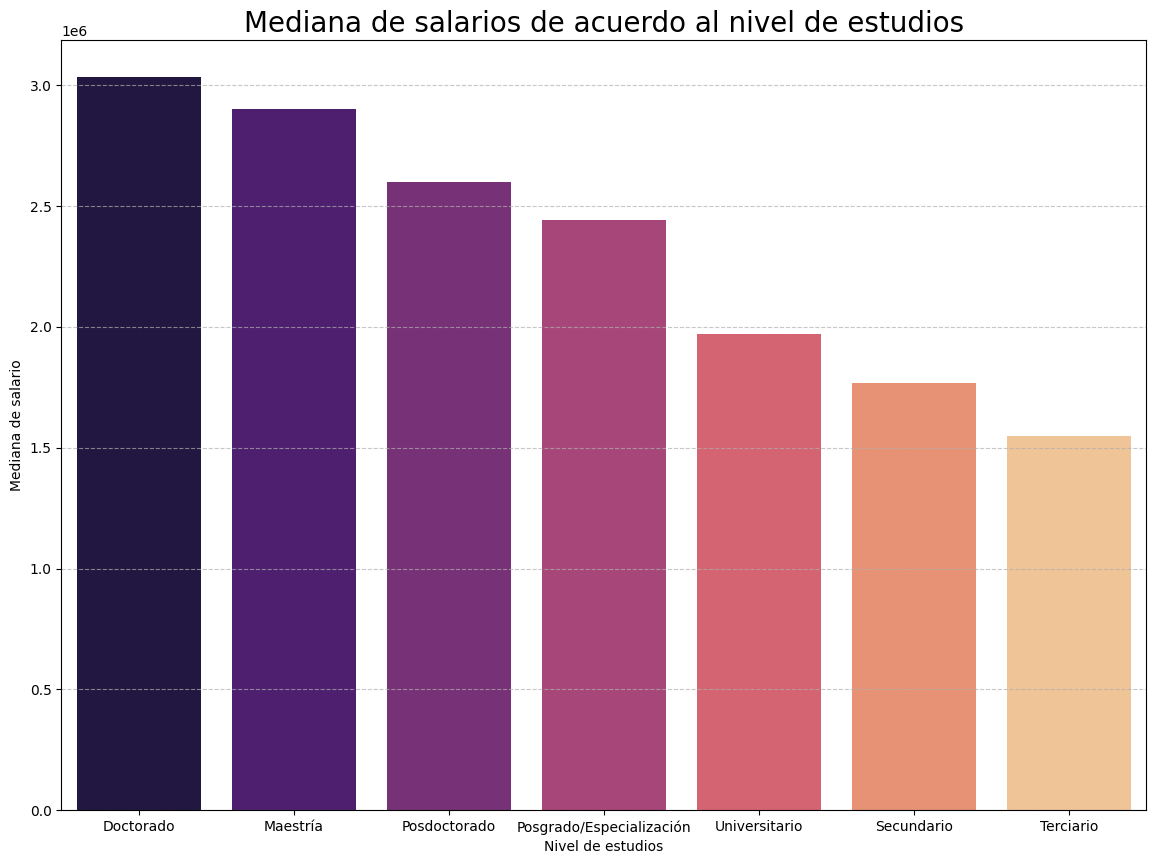

In [24]:
# Visualización (Storytelling)

# 1. Configurar el tamaño del lienzo (Ancho, Alto)
plt.figure(figsize=(14, 10))

# 2. Crear el gráfico con Seaborn
# data: de dónde saco los datos
# x: qué va abajo ('Nivel de estudios')
# y: qué define la altura ('Mediana de salario')
# palette: colores ('viridis', 'magma', 'Blues_d')
sns.barplot(data=mediana_salario, x='estudios', y='salario', palette='magma')

# 3. Personalizar (Títulos y etiquetas)
plt.title('Mediana de salarios de acuerdo al nivel de estudios', fontsize=20)
plt.xlabel('Nivel de estudios')
plt.ylabel('Mediana de salario')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Líneas de guía horizontales

# 4. Mostrar
plt.show()